<a href="https://colab.research.google.com/github/VenkataramanSuriya/AI-Projects-that-I-have-done/blob/main/26_Enhanced_Handwritten_Digit_Recognition_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **26. Enhanced Handwritten Digit Recognition using Neural Networks**

**Importing Libraries**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

**Retriveing The inbuid Data**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**Display a few sample images and their labels**

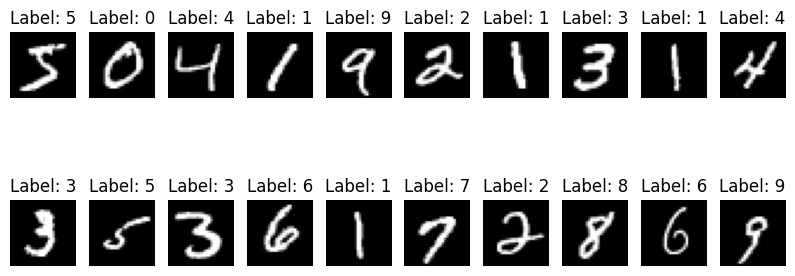

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (_, _) = mnist.load_data()

num_samples = 20  # Number of samples to visualize
plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(2, num_samples // 2, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

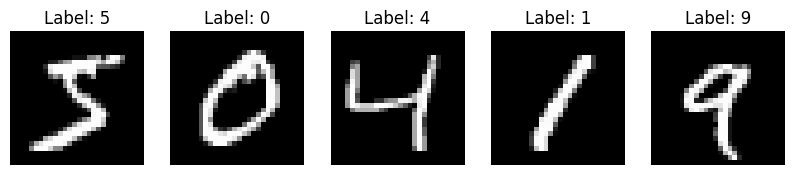

In [ ]:
num_samples = 5
plt.figure(figsize=(10, 4))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

In [ ]:
plt.show()

**Build the CNN model**

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

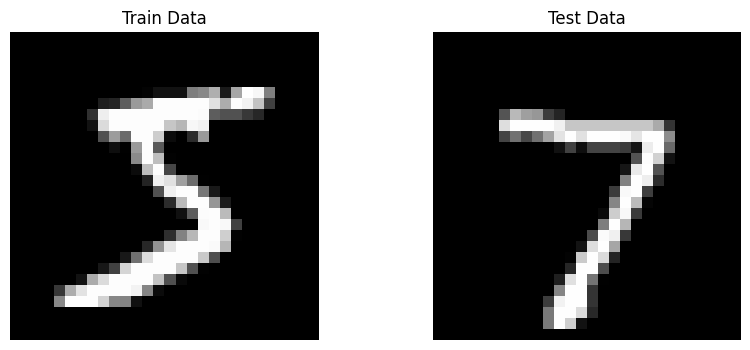

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title("Train Data")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(test_images[0], cmap='gray')
plt.title("Test Data")
plt.axis('off')

plt.show()

**Compile the model**

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

**Train the model**

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 [==============================] - 64s 66ms/step - loss: 0.3377 - accuracy: 0.9332 - val_loss: 0.0640 - val_accuracy: 0.9798
Epoch 2/5
938/938 [==============================] - 57s 61ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0518 - val_accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0483 - accuracy: 0.9855 - val_loss: 0.0617 - val_accuracy: 0.9816
Epoch 4/5
938/938 [==============================] - 56s 60ms/step - loss: 0.0380 - accuracy: 0.9883 - val_loss: 0.0547 - val_accuracy: 0.9844
Epoch 5/5
938/938 [==============================] - 55s 59ms/step - loss: 0.0364 - accuracy: 0.9884 - val_loss: 0.0437 - val_accuracy: 0.9868


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

NameError: ignored

**Evaluate the model**

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 3s 10ms/step - loss: 0.0325 - accuracy: 0.9884
Test accuracy: 0.9883999824523926
